This script is for analysing the ability of the model to identify low-visibility events (visibility observations below 4 km) using confusion matrices and classification metrics. Please refer to Section 3.3.3 of the report for more information. This script produces the plots and numbers in Section 4.5 of the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
import seaborn as sns

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"test_results_df/lead_time_continuous/"

In [5]:
# Results df for random forest regression
df_test_result = pd.read_csv(result_path + "results_giant_20_300.csv")
# Results df for random forest regression (modelling transformed vis obs)
df_test_result_transformed = pd.read_csv(result_path + "results_giant_log_20_300.csv")
# Results df for quantile regression forest
df_test_result_quantile = pd.read_csv(result_path + "results_giant_20_300_quantile.csv")
# Results df for quantile regression forest (modelling transformed vis obs)
df_test_result_quantile_log = pd.read_csv(result_path + "results_giant_20_300_quantile_log.csv")

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


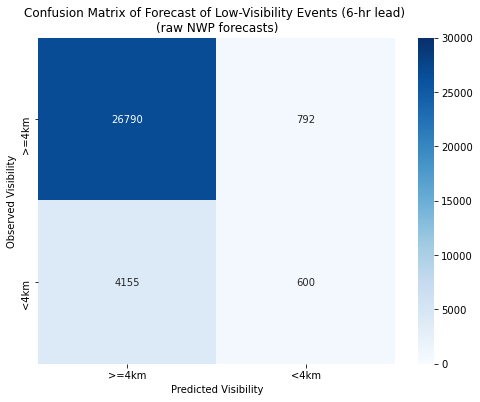

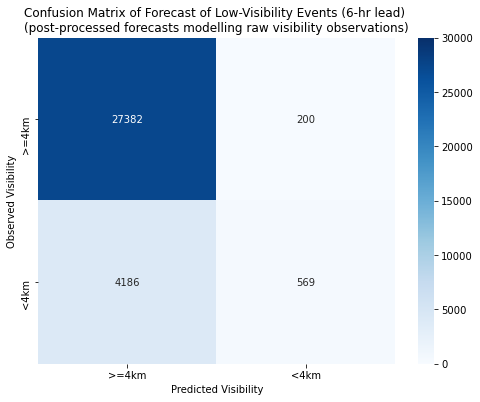

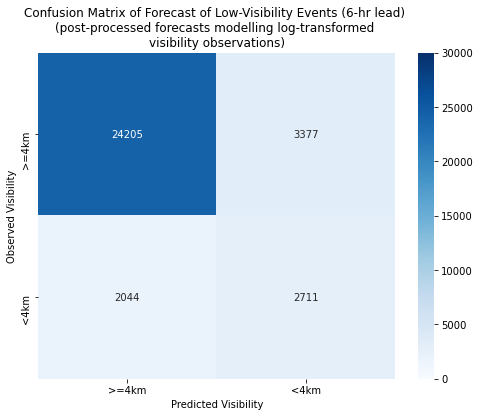

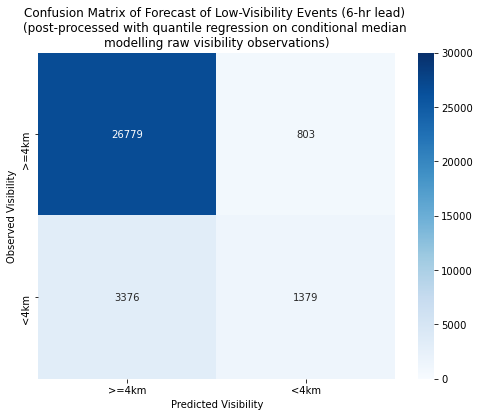

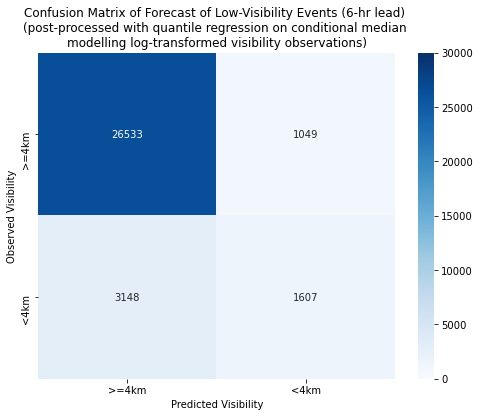

In [6]:
# Plot confusion matrices
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

for l in [6]: # Analyse lead time of 6 hrs only
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    df_result_lead_transformed = df_test_result_transformed[df_test_result_transformed['lead_hr']==l]
    df_result_lead_quantile = df_test_result_quantile[df_test_result_quantile['lead_hr']==l]
    df_result_lead_quantile_log = df_test_result_quantile_log[df_test_result_quantile_log['lead_hr']==l]
    # Visibility observations
    y_actual = (df_result_lead['vis_obs']<4000).astype(int)
    # Raw NWP forecasts
    y_nwp = (df_result_lead['vis_ensemble_mean']<4000).astype(int)
    # Post-processed forecasts using random forest regression
    y_rf = (df_result_lead['vis_rf']<4000).astype(int)
    # Post-processed forecasts using random forest regression (modelling transformed vis obs)
    y_rf_transformed = (df_result_lead_transformed['vis_rf']<4000).astype(int)
    # Post-processed forecasts using quantile regression forest
    y_rf_quantile = (df_result_lead_quantile['vis_rf_26']<4000).astype(int)
    # Post-processed forecasts using quantile regression forest (modelling transformed vis obs)
    y_rf_quantile_log= (df_result_lead_quantile_log['vis_rf_26']<4000).astype(int)
    # Create confusion matrices
    cm_nwp = confusion_matrix(y_actual, y_nwp)
    cm_rf = confusion_matrix(y_actual, y_rf)
    cm_rf_transformed = confusion_matrix(y_actual, y_rf_transformed)
    cm_rf_quantile = confusion_matrix(y_actual, y_rf_quantile)
    cm_rf_quantile_log = confusion_matrix(y_actual, y_rf_quantile_log)
    classes=[">=4km", "<4km"]
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_nwp, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes, vmin=0, vmax=30000)
    plt.xlabel('Predicted Visibility')
    plt.ylabel('Observed Visibility')
    plt.title("Confusion Matrix of Forecast of Low-Visibility Events (6-hr lead) \n(raw NWP forecasts)")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes, vmin=0, vmax=30000)
    plt.xlabel('Predicted Visibility')
    plt.ylabel('Observed Visibility')
    plt.title("Confusion Matrix of Forecast of Low-Visibility Events (6-hr lead) \n(post-processed forecasts modelling raw visibility observations)")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_transformed, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes, vmin=0, vmax=30000)
    plt.xlabel('Predicted Visibility')
    plt.ylabel('Observed Visibility')
    plt.title("Confusion Matrix of Forecast of Low-Visibility Events (6-hr lead) \n(post-processed forecasts modelling log-transformed \nvisibility observations)")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_quantile, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes, vmin=0, vmax=30000)
    plt.xlabel('Predicted Visibility')
    plt.ylabel('Observed Visibility')
    plt.title("Confusion Matrix of Forecast of Low-Visibility Events (6-hr lead) \n(post-processed with quantile regression on conditional median \nmodelling raw visibility observations)")
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_rf_quantile_log, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes, vmin=0, vmax=30000)
    plt.xlabel('Predicted Visibility')
    plt.ylabel('Observed Visibility')
    plt.title("Confusion Matrix of Forecast of Low-Visibility Events (6-hr lead) \n(post-processed with quantile regression on conditional median \nmodelling log-transformed visibility observations)")

In [7]:
# Compute classification metrics
accuracy_nwp = round(accuracy_score(y_actual, y_nwp),3)
precision_nwp = round(precision_score(y_actual, y_nwp),3)
recall_nwp = round(recall_score(y_actual, y_nwp),3)
f1_nwp = round(f1_score(y_actual, y_nwp),3)
accuracy_rf = round(accuracy_score(y_actual, y_rf),3)
precision_rf = round(precision_score(y_actual, y_rf),3)
recall_rf = round(recall_score(y_actual, y_rf),3)
f1_rf = round(f1_score(y_actual, y_rf),3)
accuracy_rf_transformed = round(accuracy_score(y_actual, y_rf_transformed),3)
precision_rf_transformed = round(precision_score(y_actual, y_rf_transformed),3)
recall_rf_transformed = round(recall_score(y_actual, y_rf_transformed),3)
f1_rf_transformed = round(f1_score(y_actual, y_rf_transformed),3)
accuracy_rf_quantile = round(accuracy_score(y_actual, y_rf_quantile),3)
precision_rf_quantile = round(precision_score(y_actual, y_rf_quantile),3)
recall_rf_quantile = round(recall_score(y_actual, y_rf_quantile),3)
f1_rf_quantile = round(f1_score(y_actual, y_rf_quantile),3)
accuracy_rf_quantile_log = round(accuracy_score(y_actual, y_rf_quantile_log),3)
precision_rf_quantile_log = round(precision_score(y_actual, y_rf_quantile_log),3)
recall_rf_quantile_log = round(recall_score(y_actual, y_rf_quantile_log),3)
f1_rf_quantile_log = round(f1_score(y_actual, y_rf_quantile_log),3)

In [8]:
print("Accuracy (before post-processing): "+str(accuracy_nwp))
print("Accuracy (after post-processing with random forest regression): "+str(accuracy_rf))
print("Accuracy (after post-processing with random forest regression with transformation): "+str(accuracy_rf_transformed))
print("Accuracy (after post-processing with quantile regression): "+str(accuracy_rf_quantile))
print("Accuracy (after post-processing with quantile regression with transformation): "+str(accuracy_rf_quantile_log))
print("")
print("Precision (before post-processing): "+str(precision_nwp))
print("Precision (after post-processing with random forest regression): "+str(precision_rf))
print("Precision (after post-processing with random forest regression with transformation): "+str(precision_rf_transformed))
print("Precision (after post-processing with quantile regression): "+str(precision_rf_quantile))
print("Precision (after post-processing with quantile regression with transformation): "+str(precision_rf_quantile_log))
print("")
print("Recall (before post-processing): "+str(recall_nwp))
print("Recall (after post-processing with random forest regression): "+str(recall_rf))
print("Recall (after post-processing with random forest regression with transformation): "+str(recall_rf_transformed))
print("Recall (after post-processing with quantile regression): "+str(recall_rf_quantile))
print("Recall (after post-processing with quantile regression with transformation): "+str(recall_rf_quantile_log))
print("")
print("F-1 score (before post-processing): "+str(f1_nwp))
print("F-1 score (after post-processing with random forest regression): "+str(f1_rf))
print("F-1 score (after post-processing with random forest regression with transformation): "+str(f1_rf_transformed))
print("F-1 score (after post-processing with quantile regression): "+str(f1_rf_quantile))
print("F-1 score (after post-processing with quantile regression with transformation): "+str(f1_rf_quantile_log))

Accuracy (before post-processing): 0.847
Accuracy (after post-processing with random forest regression): 0.864
Accuracy (after post-processing with random forest regression with transformation): 0.832
Accuracy (after post-processing with quantile regression): 0.871
Accuracy (after post-processing with quantile regression with transformation): 0.87

Precision (before post-processing): 0.431
Precision (after post-processing with random forest regression): 0.74
Precision (after post-processing with random forest regression with transformation): 0.445
Precision (after post-processing with quantile regression): 0.632
Precision (after post-processing with quantile regression with transformation): 0.605

Recall (before post-processing): 0.126
Recall (after post-processing with random forest regression): 0.12
Recall (after post-processing with random forest regression with transformation): 0.57
Recall (after post-processing with quantile regression): 0.29
Recall (after post-processing with qua